In [11]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.ensemble import IsolationForest
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
from sklearn.datasets import fetch_kddcup99
import numpy as np
kddcup99_data = fetch_kddcup99()
X = kddcup99_data['data']
y = kddcup99_data['target']
y[y == b'normal.'] = 1
y[y!= 1] = -1
y = np.int64(y)

In [3]:
sample_indices = np.random.choice(range(len(y)), 59000)
X_sample = X[sample_indices,:]
y_sample=y[sample_indices]
print(X_sample.shape)
print(y_sample.shape)

(59000, 41)
(59000,)


In [4]:
X_num_sample = np.delete(X_sample,[1,2,3],1)
print(X_num_sample.shape)
print(y_sample.shape)

(59000, 38)
(59000,)


In [5]:
recall_scores = []
precision_scores = []
f1_scores = []

def num_of_features(n):
    fs = SelectKBest(score_func = f_classif, k = n)
    X_selected = fs.fit_transform(X_num_sample,y_sample)
#     print(X_selected.shape)
    
    isof = IsolationForest(max_samples=100, random_state=42)
    isof.fit(X_selected)
    anomaly_predictions = isof.predict(X_selected)
    anomaly_predictions = np.array(anomaly_predictions)
#     print(anomaly_predictions[0:100])
    
    r = recall_score(y_sample, anomaly_predictions, pos_label = -1)
    p = precision_score(y_sample, anomaly_predictions, pos_label = -1)
    f = f1_score(y_sample, anomaly_predictions, pos_label = -1)
#     print('r=', r, '\np=', p, '\nf=', f)
    
    recall_scores.append(r)
    precision_scores.append(p)
    f1_scores.append(f)
    

In [13]:
def single_calc(n):
    fs = SelectKBest(score_func = f_classif, k = n)
    X_selected = fs.fit_transform(X_num_sample,y_sample)
#     print(X_selected.shape)
    
    isof = IsolationForest(max_samples=100, random_state=42)
    isof.fit(X_selected)
    anomaly_predictions = isof.predict(X_selected)
    anomaly_predictions = np.array(anomaly_predictions)
#     print(anomaly_predictions[0:100])
    
    r = recall_score(y_sample, anomaly_predictions, pos_label = -1)
    p = precision_score(y_sample, anomaly_predictions, pos_label = -1)
    f = f1_score(y_sample, anomaly_predictions, pos_label = -1)
    print('r=', r, '\np=', p, '\nf=', f)

In [6]:
ilist = []
i = 1
while i<39:
    num_of_features(i)
    ilist.append(i)
    i=i+1

c:\users\kajia\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 5 11 16 17] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
c:\users\kajia\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\users\kajia\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 5 11 16 17] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
c:\users\kajia\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\users\kajia\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\feature_s

c:\users\kajia\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 5 11 16 17] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
c:\users\kajia\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\users\kajia\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 5 11 16 17] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
c:\users\kajia\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\users\kajia\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\feature_s

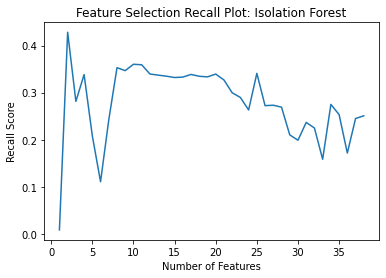

In [7]:
import matplotlib.pyplot as plt
plt.plot(ilist, recall_scores)
plt.xlabel('Number of Features')
plt.ylabel('Recall Score')
plt.title('Feature Selection Recall Plot: Isolation Forest')
plt.show()

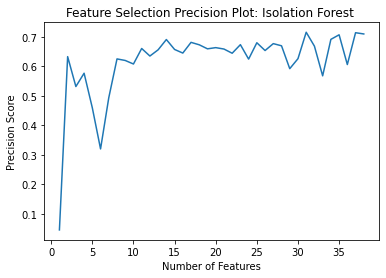

In [8]:
import matplotlib.pyplot as plt
plt.plot(ilist, precision_scores)
plt.xlabel('Number of Features')
plt.ylabel('Precision Score')
plt.title('Feature Selection Precision Plot: Isolation Forest ')
plt.show()

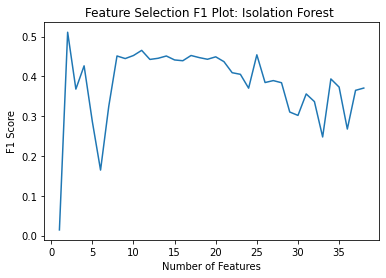

In [9]:
import matplotlib.pyplot as plt
plt.plot(ilist, f1_scores)
plt.xlabel('Number of Features')
plt.ylabel('F1 Score')
plt.title('Feature Selection F1 Plot: Isolation Forest ')
plt.show()

In [14]:
single_calc(2)

c:\users\kajia\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 5 11 16 17] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
c:\users\kajia\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


r= 0.4282539682539683 
p= 0.632640300140691 
f= 0.5107591342209883


In [15]:
single_calc(3)

c:\users\kajia\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 5 11 16 17] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
c:\users\kajia\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


r= 0.28146031746031747 
p= 0.5312375169769114 
f= 0.36796524818770404


In [16]:
single_calc(4)

c:\users\kajia\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 5 11 16 17] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
c:\users\kajia\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


r= 0.33834920634920634 
p= 0.5763781230846883 
f= 0.4263939082774347


By looking at the 3 plots, it can be seen that there are trade offs between precision and recall. However, it appears that using only 2 features is most effective. 

-------------------------------------------------------------------------